# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Explore the Data

---

## 1.) Import packages

In [125]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

In [127]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("bright")
plt.rcParams['figure.figsize'] = [12, 6]

---
## 2.) Loading data with Pandas

In [128]:
df = pd.read_csv('../data/raw_data/Future_Value_Insights_data.csv')

---
## 3.) Exploring Data

In [129]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [130]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [131]:
#correlation method to find the relationship between numerical features
df.corr(numeric_only=True)

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [132]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'area' variable:  ",end=" ")
print(df['area'].unique())

print("Categories in'qualification' variable:",end=" " )
print(df['qualification'].unique())

print("Categories in 'income' variable:    ",end=" " )
print(df['income'].unique())

print("Categories in 'num_policies' variable:     ",end=" " )
print(df['num_policies'].unique())

print("Categories in 'policy' variable:     ",end=" " )
print(df['policy'].unique())

print("Categories in 'type_of_policy' variable:     ",end=" " )
print(df['type_of_policy'].unique())

Categories in 'gender' variable:      ['Male' 'Female']
Categories in 'area' variable:   ['Urban' 'Rural']
Categories in'qualification' variable: ['Bachelor' 'High School' 'Others']
Categories in 'income' variable:     ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
Categories in 'num_policies' variable:      ['More than 1' '1']
Categories in 'policy' variable:      ['A' 'C' 'B']
Categories in 'type_of_policy' variable:      ['Platinum' 'Gold' 'Silver']


In [133]:
for i in df:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in id is 89392
id
1        1
59593    1
59601    1
59600    1
59599    1
        ..
29796    1
29795    1
29794    1
29793    1
89392    1
Name: count, Length: 89392, dtype: int64
-----------------------------------------
Unique values in gender is 2
gender
Male      50497
Female    38895
Name: count, dtype: int64
-----------------------------------------
Unique values in area is 2
area
Urban    62455
Rural    26937
Name: count, dtype: int64
-----------------------------------------
Unique values in qualification is 3
qualification
High School    46247
Bachelor       39399
Others          3746
Name: count, dtype: int64
-----------------------------------------
Unique values in income is 4
income
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: count, dtype: int64
-----------------------------------------
Unique values in marital_status is 2
marital_status
1    51444
0    37948
Name: count, dtype: int64
---------------------

---
# 4.) Data Visualization

## Preparing the Data for Visualization

In [134]:
# Convert 'marital_status' to categorical using mapping
df['marital_status'] = df['marital_status'].map({1: 'Married', 0: 'Single'}).astype('object')

# Simplify 'num_policies'
df['num_policies'] = df['num_policies'].replace({'More than 1': '>1'})

# Handle 'income' as ordinal
income_order = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']  # Adjusted based on actual categories
df['income'] = pd.Categorical(df['income'], categories=income_order, ordered=True)

# Identify categorical and numerical variables
categoricals = df.select_dtypes(include=['object', 'category']).columns
numeric = df.select_dtypes(include=['int64', 'float64']).columns

# Print results for verification
print("Categorical Variables:", categoricals)
print("Numerical Variables:", numeric)

Categorical Variables: Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies', 'policy', 'type_of_policy'],
      dtype='object')
Numerical Variables: Index(['id', 'vintage', 'claim_amount', 'cltv'], dtype='object')


# Visualizing the Numerical Data

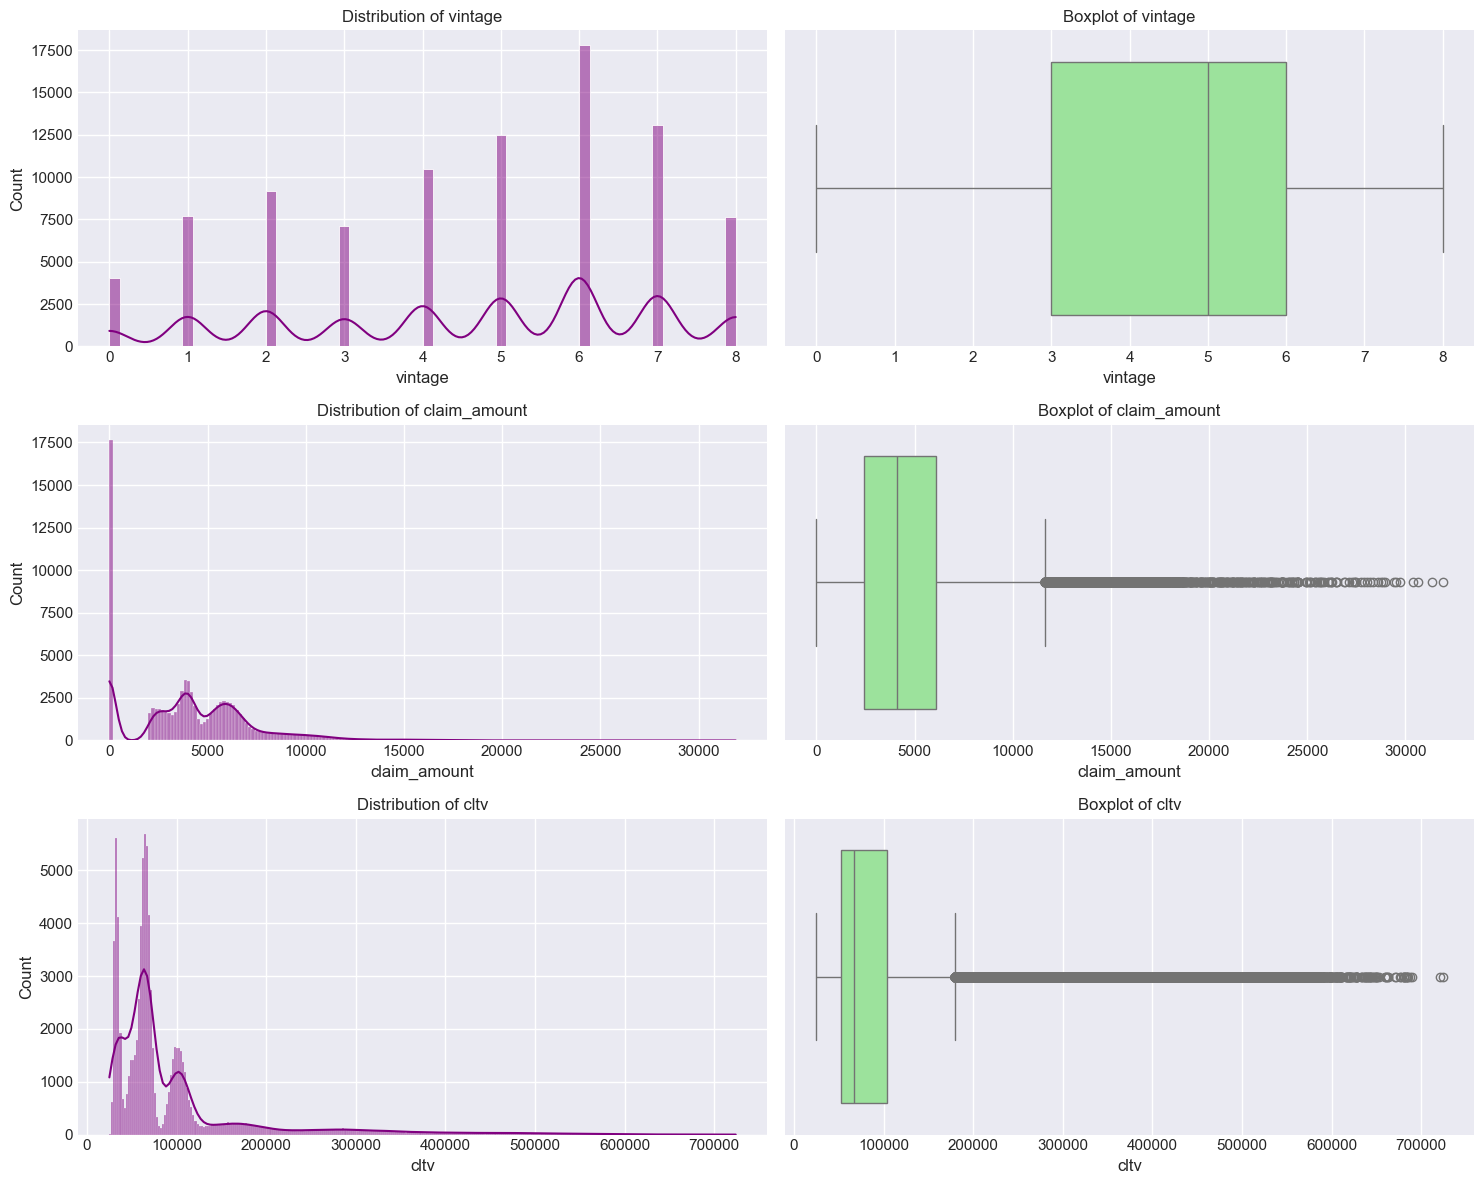

In [135]:
num_cols = ['vintage', 'claim_amount', 'cltv']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for i, col in enumerate(num_cols):
    # Histogram and KDE
    sns.histplot(df[col], kde=True, ax=axes[i,0], color='purple')
    axes[i,0].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i,1], color='lightgreen')
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Visualizing Categorical Data

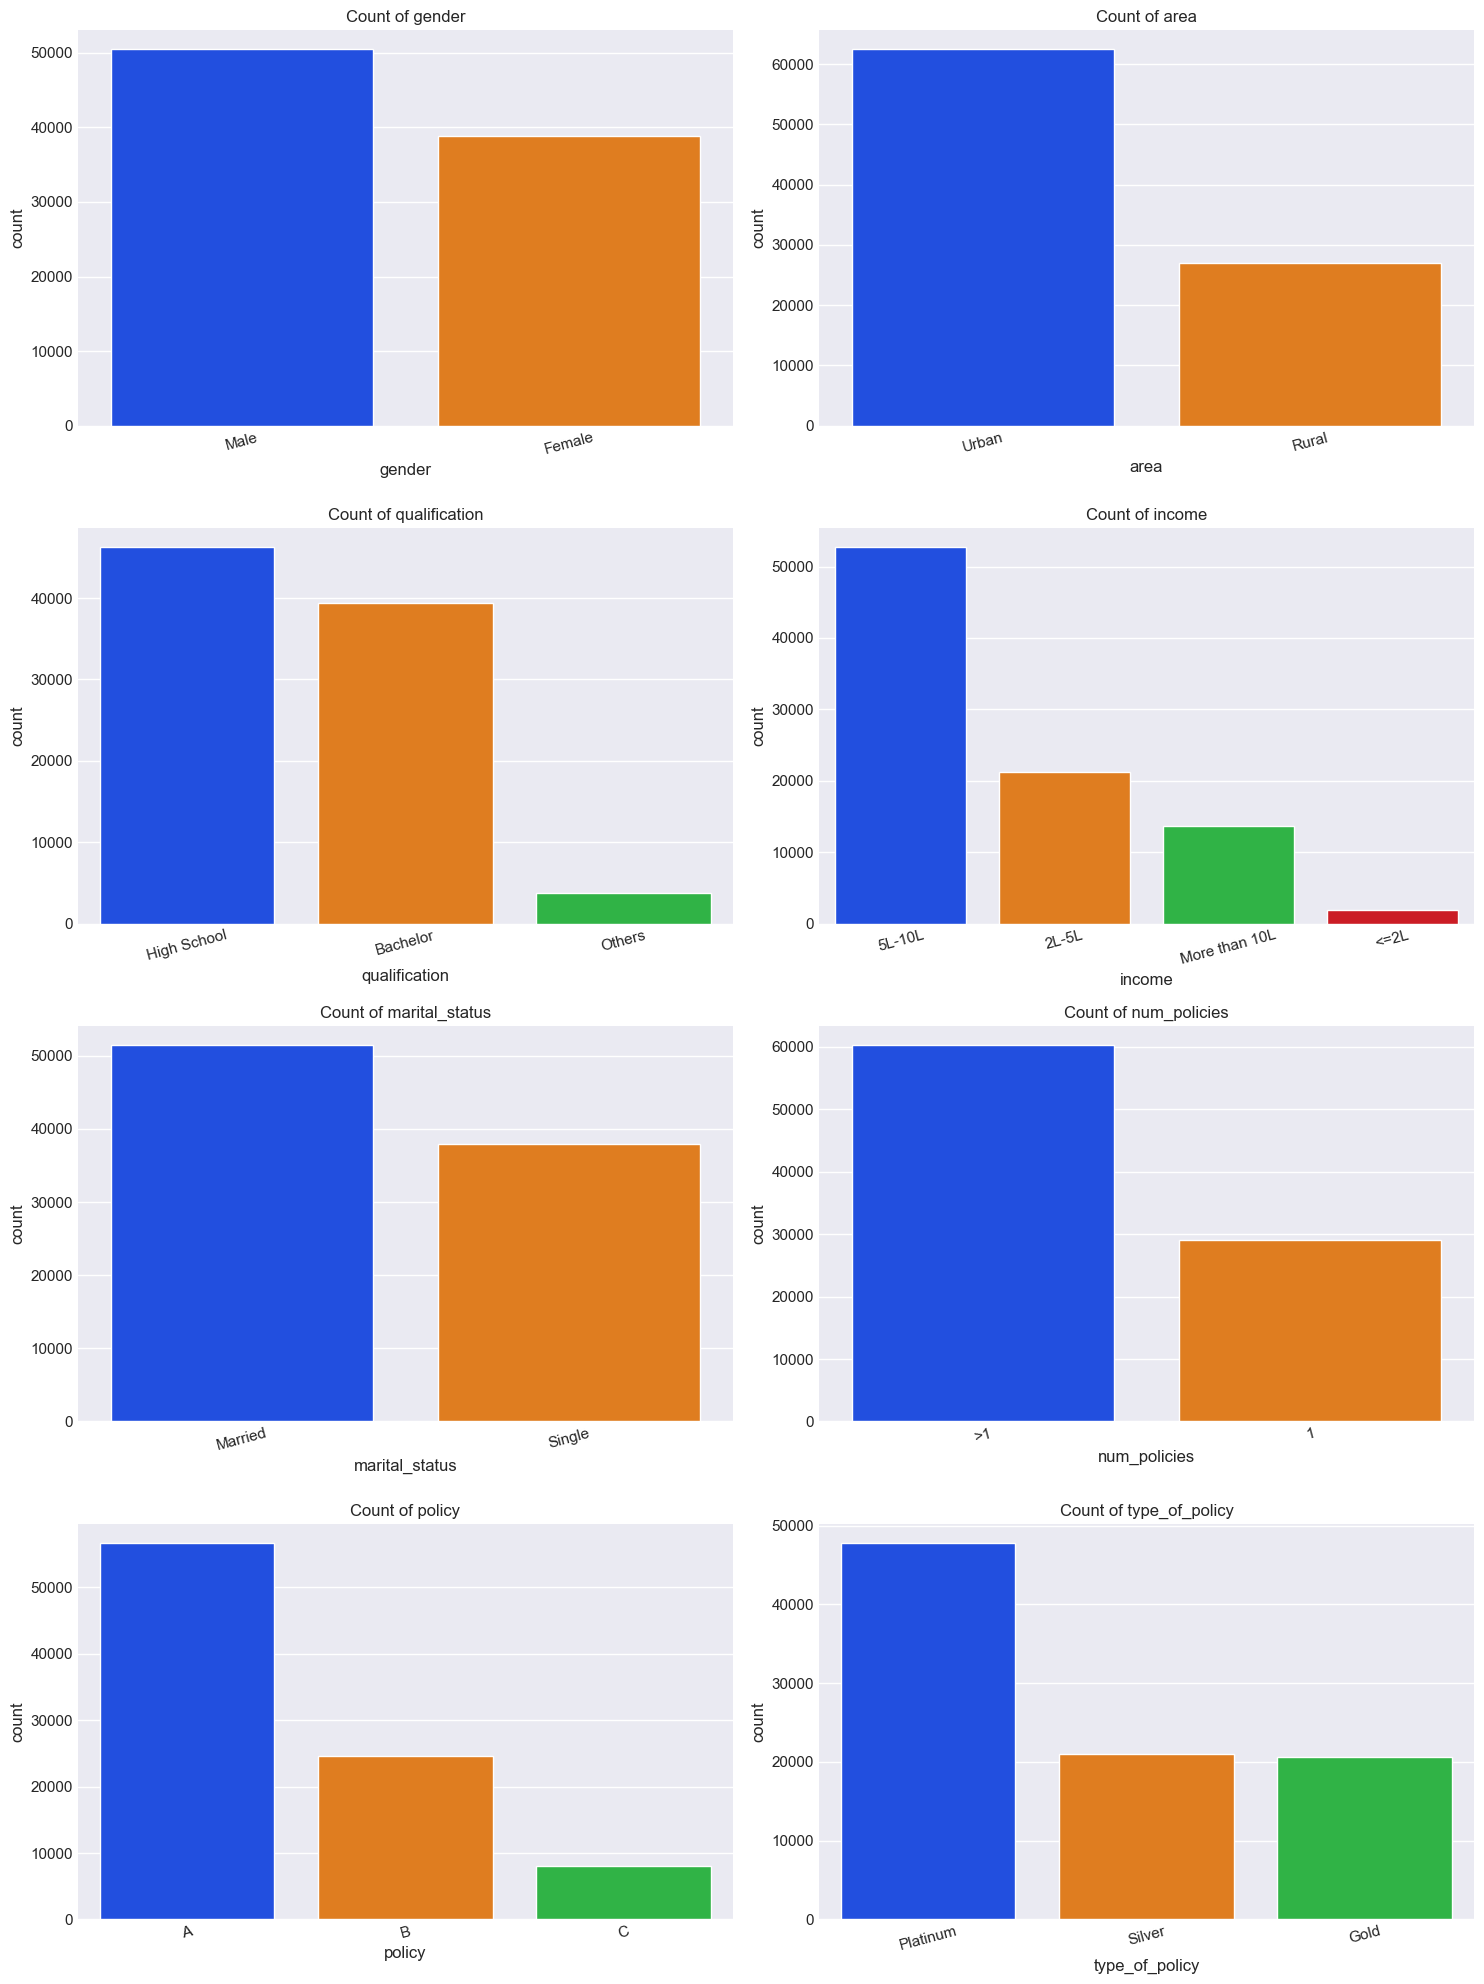

In [80]:
cat_cols = ['gender', 'area', 'qualification', 'income', 'marital_status', 'num_policies', 'policy', 'type_of_policy']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df,palette='bright', order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Boxplots

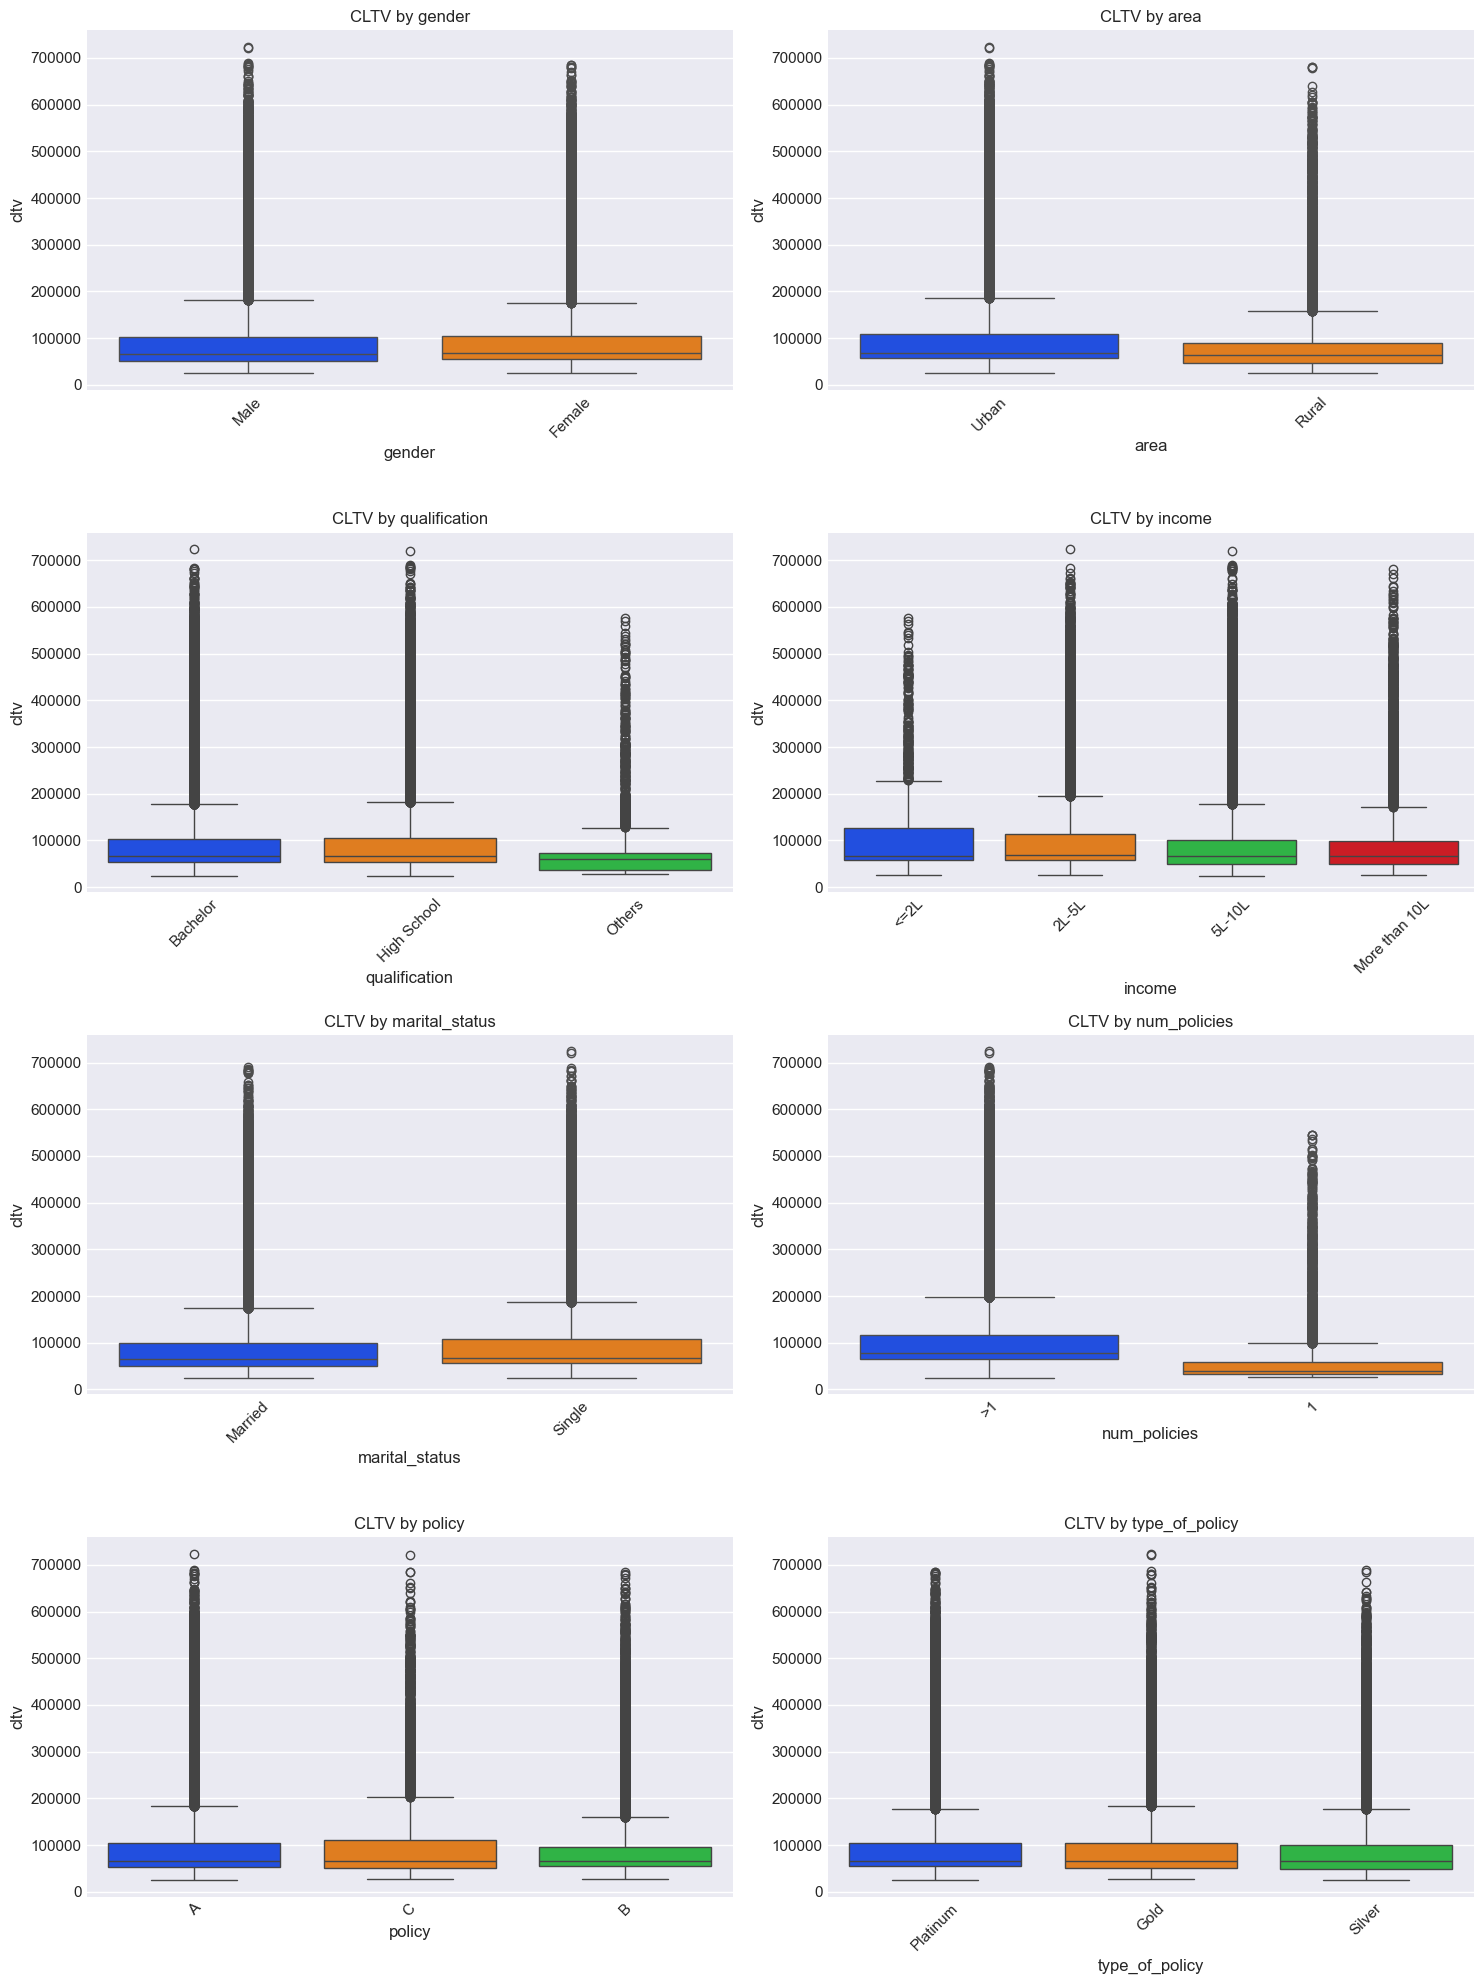

In [103]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=col, y='cltv', data=df, palette='bright')
    plt.title(f'CLTV by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

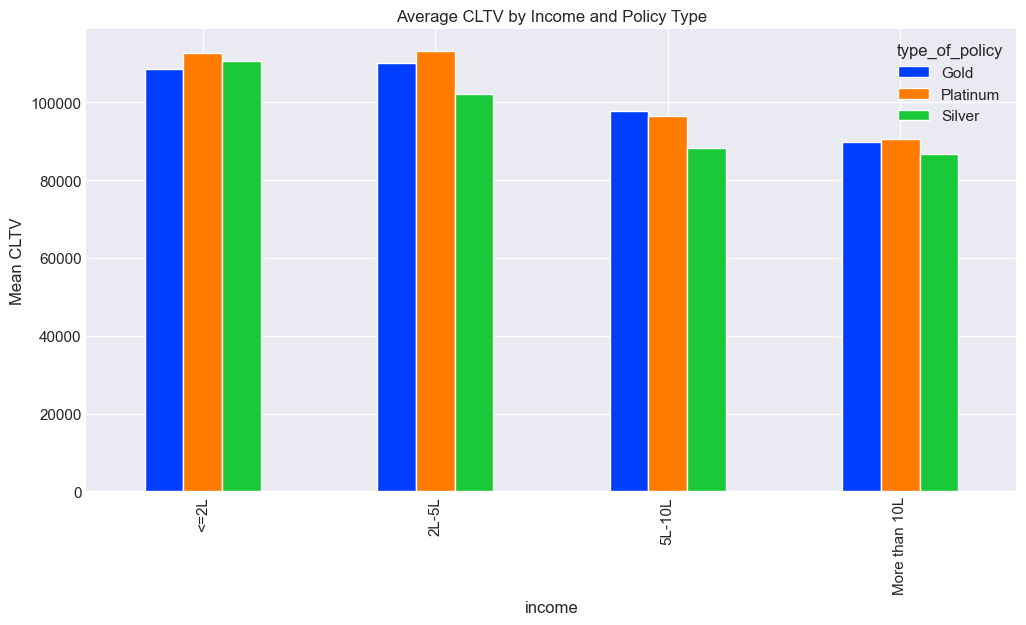

In [104]:
# Example: Average CLTV by Income and Policy Type
plt.figure(figsize=(10, 6))
df.groupby(['income', 'type_of_policy'])['cltv'].mean().unstack().plot(kind='bar')
plt.title('Average CLTV by Income and Policy Type')
plt.ylabel('Mean CLTV')
plt.show()

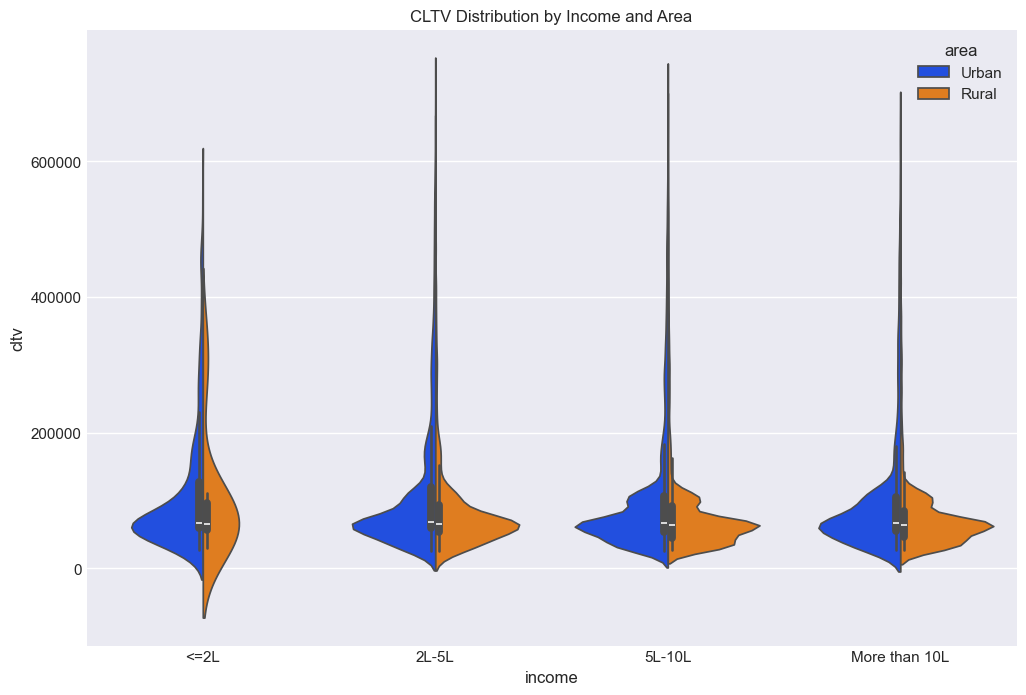

In [105]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='income', y='cltv', hue='area', data=df, split=True)
plt.title('CLTV Distribution by Income and Area')
plt.show()

# Checking for outliers in CLTV

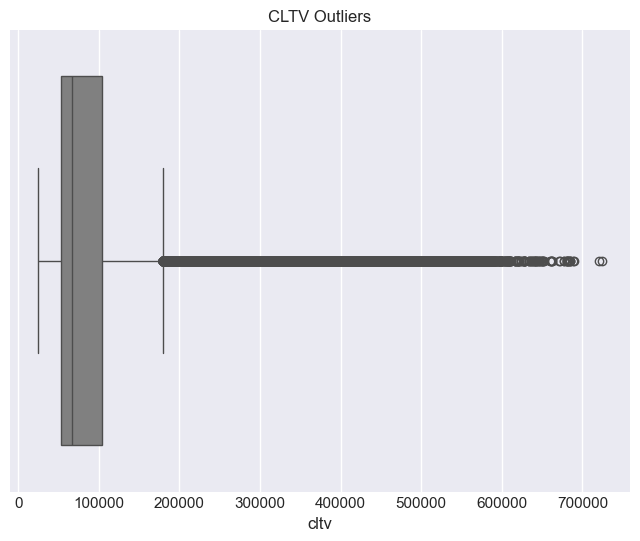

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cltv'], color='gray')
plt.title('CLTV Outliers')
plt.show()

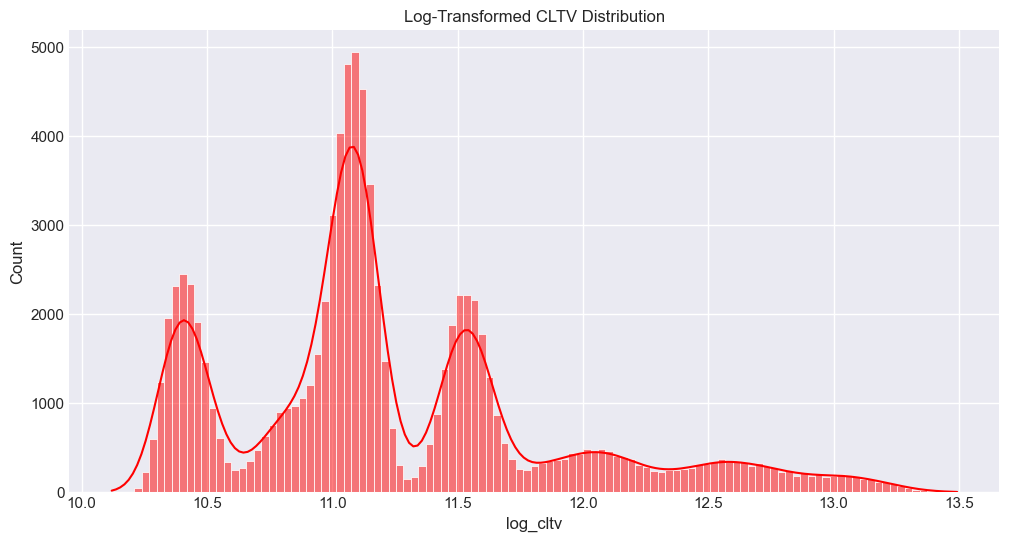

In [110]:
df['log_cltv'] = np.log1p(df['cltv'])
sns.histplot(df['log_cltv'], kde=True, color='red')
plt.title('Log-Transformed CLTV Distribution')
plt.show()

# Scatterplot

<Axes: xlabel='claim_amount', ylabel='cltv'>

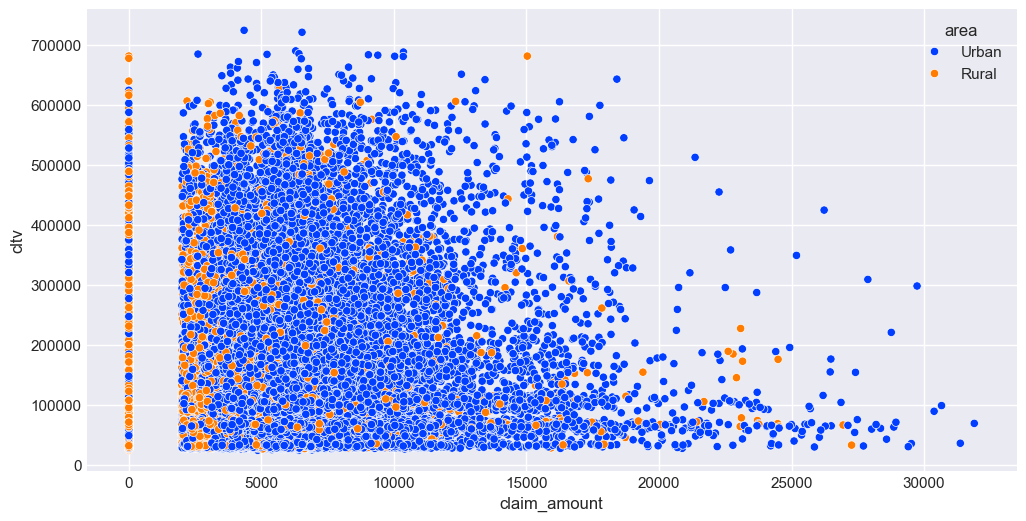

In [112]:
#cltv and claim_amount against area
sns.scatterplot(data=df, x="claim_amount", y="cltv", hue="area")

<Axes: xlabel='claim_amount', ylabel='cltv'>

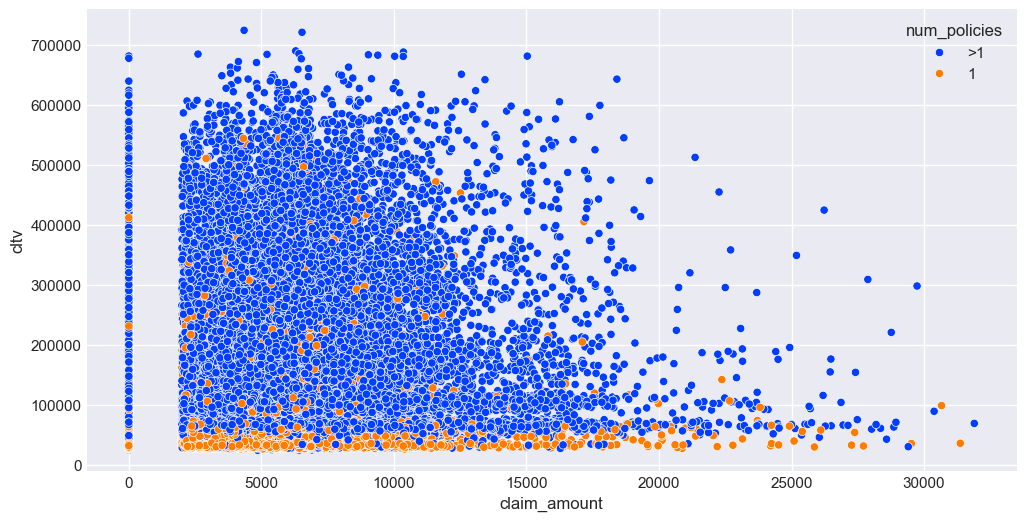

In [113]:
#cltv and claim_amount against num_policies
sns.scatterplot(data=df, x="claim_amount", y="cltv", hue="num_policies")

# Pairplot

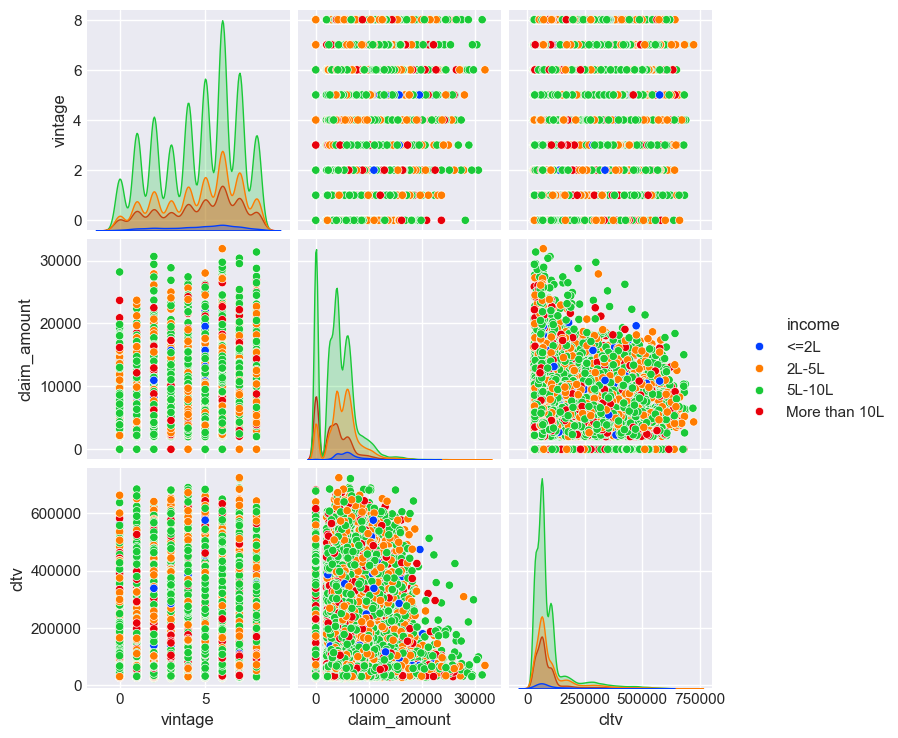

In [114]:
sns.pairplot(df[['vintage', 'claim_amount', 'cltv', 'income']], hue='income')
plt.show()

<Figure size 1500x1000 with 0 Axes>

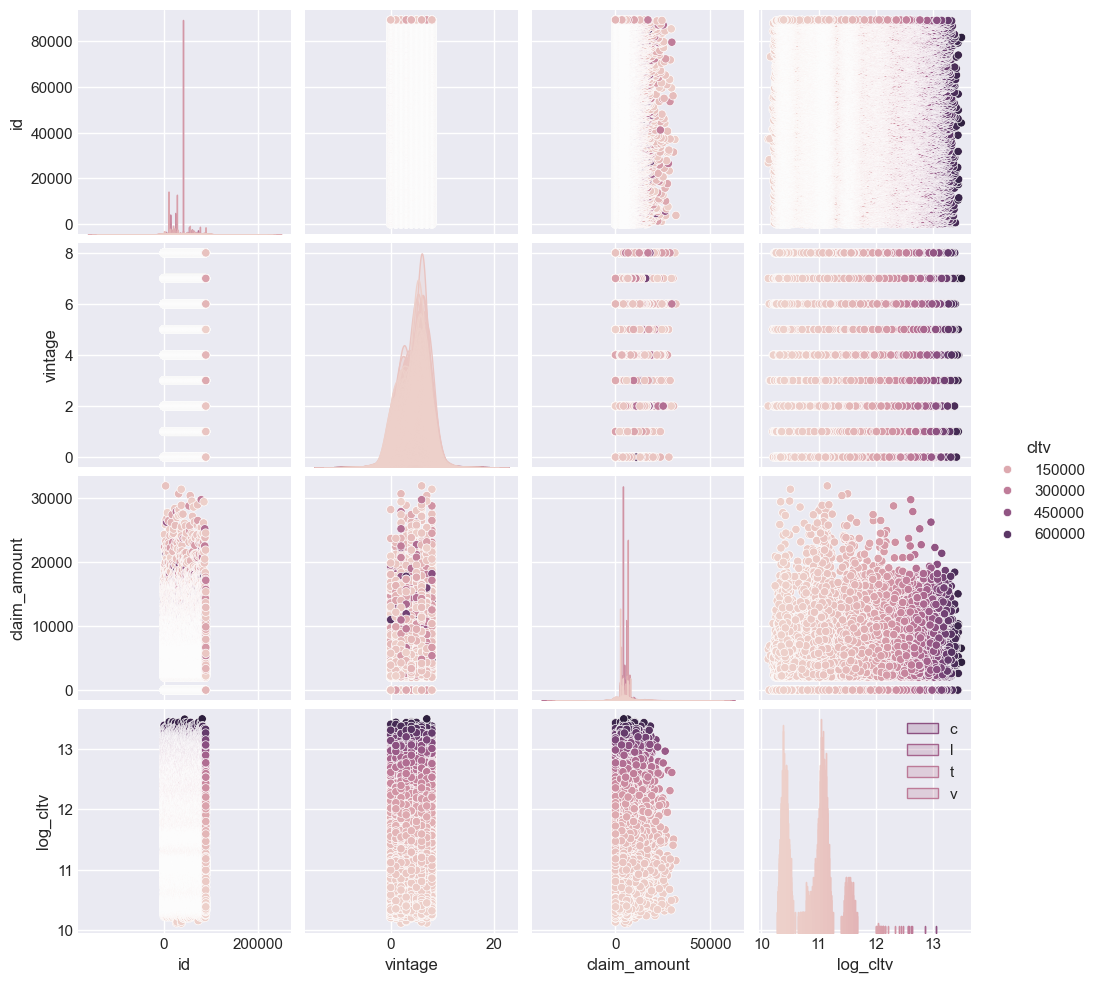

In [115]:
# Pair plot: It shows the relationship between numerical features and also shows the distribution and relationship of each numerical columns between each combination.
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='cltv')
plt.legend('cltv')
plt.show()

# Correlations

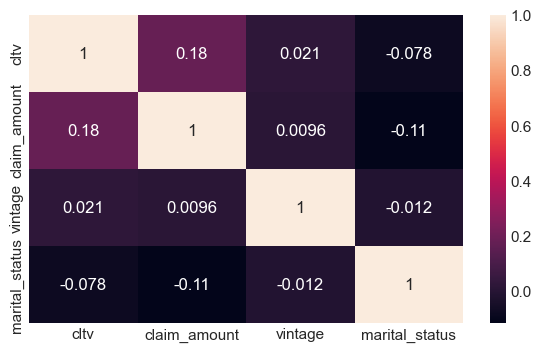

In [ ]:
# Encode 'marital_status' column
df['marital_status'] = df['marital_status'].map({'Married': 1, 'Single': 0}) 

heatmap = df[['cltv', 'claim_amount', 'vintage','marital_status']]

plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

## Correlation heatmap to visually identify the relationship between numerical features

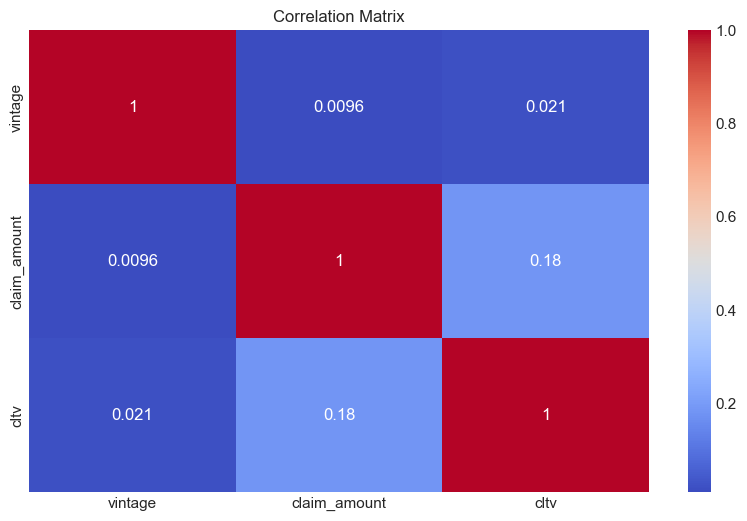

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['vintage', 'claim_amount', 'cltv']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [139]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         89392 non-null  int64
 1   marital_status             89392 non-null  int64
 2   vintage                    89392 non-null  int64
 3   claim_amount               89392 non-null  int64
 4   cltv                       89392 non-null  int64
 5   gender_Female              89392 non-null  bool 
 6   gender_Male                89392 non-null  bool 
 7   area_Rural                 89392 non-null  bool 
 8   area_Urban                 89392 non-null  bool 
 9   qualification_Bachelor     89392 non-null  bool 
 10  qualification_High School  89392 non-null  bool 
 11  qualification_Others       89392 non-null  bool 
 12  income_<=2L                89392 non-null  bool 
 13  income_2L-5L               89392 non-null  bool 
 14  income_5L-10L         

<Axes: >

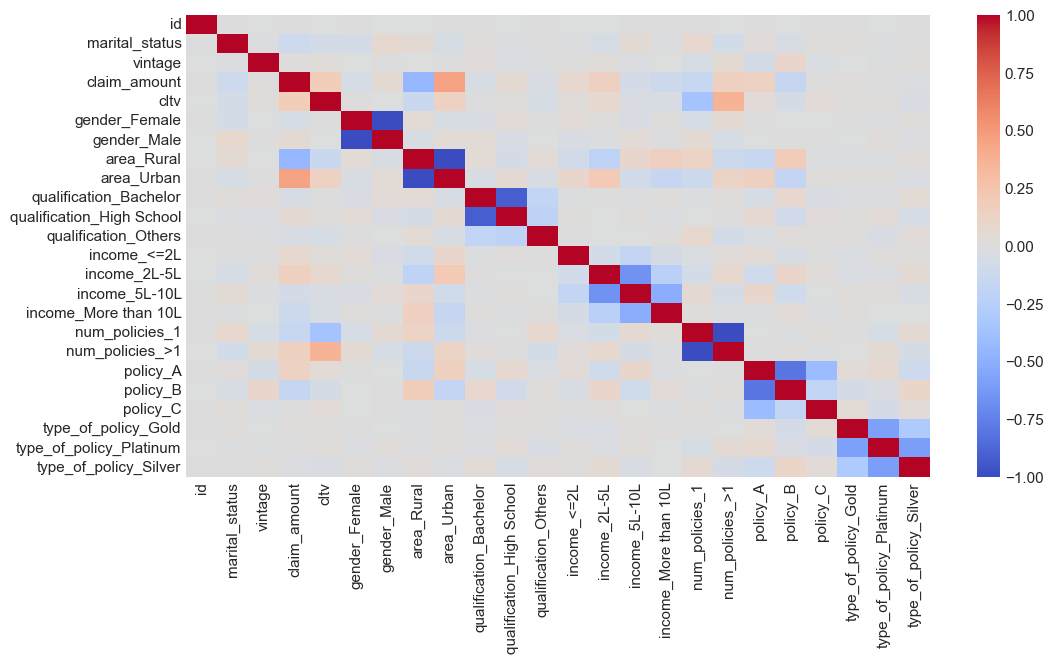

In [140]:
#Heatmap
sns.heatmap(df.corr(), cmap='coolwarm')